Imports

In [65]:
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import torch.nn as F
import torchvision.transforms as transforms
import numpy as np

print(torch.version.cuda)

12.1


Set device

In [66]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"using {device} device")

using cuda device


# MNIST Dataset

### Import MNIST dataset

In [67]:
train_dataset = datasets.MNIST(root = './data',
                               train = True,
                               transform = transforms.Compose([
                                   transforms.Resize((32,32)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.1325,), std = (0.3105,))]),
                               download = True
                               )

test_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.Compose([
                                   transforms.Resize((32, 32)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.1325,), std=(0.3105,))]),
                               download=True
                               )
        
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)

### Set up the LeNet ANN

In [68]:
class LeNet(F.Module):
    def __init__(self, num_classes):
        super(LeNet, self).__init__()
        self.layer1 = F.Sequential(
            F.Conv2d(1, 6, kernel_size = 5, stride=1, padding = 0),
            F.BatchNorm2d(6),
            F.ReLU(),
            F.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = F.Sequential(
            F.Conv2d(6, 16, kernel_size = 5, stride=1, padding = 0),
            F.BatchNorm2d(16),
            F.ReLU(),
            F.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = F.Linear(400,120)
        self.relu = F.ReLU()
        self.fc1 = F.Linear(120,84)
        self.relu1 = F.ReLU()
        self.fc2 = F.Linear(84,num_classes)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

### Epoch tests

##### Set Hyperparamaters

In [69]:
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

##### Set up NN

In [70]:
model = LeNet(num_classes = num_classes).to(device)

cost = F.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)

error = []

##### run NN. Record accuracy at the end

In [71]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = cost(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total+=labels.size(0)
            correct+=(predicted == labels).sum().item()
        error.append(100 * correct / total)
        

KeyboardInterrupt: 

##### Graph

In [ ]:
plt.plot(error)
plt.show()

In [ ]:
print("Maximum accuracy of the network on the 10000 test images: {} at epoch {}".format(np.max(error), np.argmax(error)))

### Optimal Learning Rate

##### Hyperparameters

In [74]:
batch_size = 64
num_classes = 10
learning_rate = [0.1,0.01,0.001,0.0001,0.00001]
num_epochs = 7
error = []

##### Set up NN. Then Run it for each Learning rate

In [75]:
for i in learning_rate:    
    model = LeNet(num_classes = num_classes).to(device)
    
    cost = F.CrossEntropyLoss()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=i)
    
    total_step = len(train_loader)
    error.append([])
    for epoch in range(num_epochs):
        
        for j, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = cost(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            error[-1].append(loss.item())

##### Graphs
Removed the first 1000 cases because the first epoch created an outlier.


There is an additional graph because the learning rate of 0.1 threw the scale of the graph off.

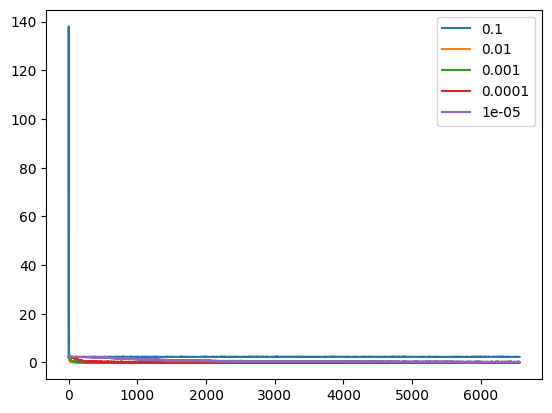

In [96]:
for i in range(len(error)):
    plt.plot(error[i], label='{}'.format(learning_rate[i]))
plt.legend()
plt.show()

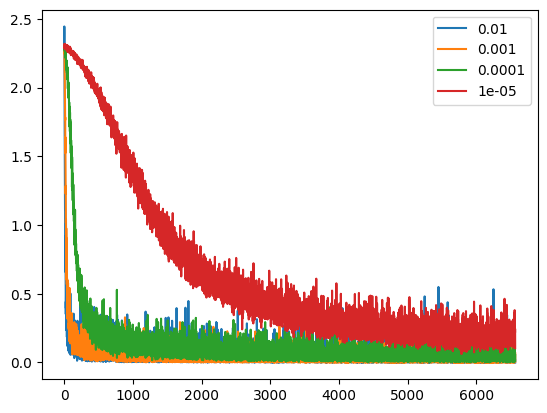

In [97]:
for i in range(1,len(error)):
    plt.plot(error[i], label='{}'.format(learning_rate[i]))
plt.legend()
plt.show()

All individual graphs

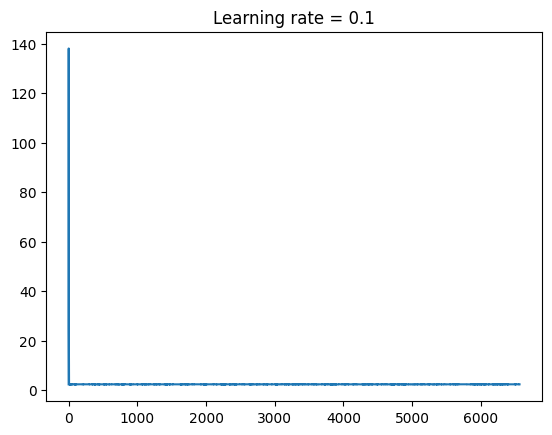

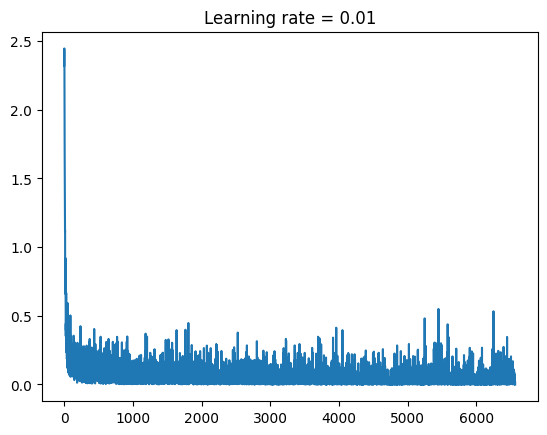

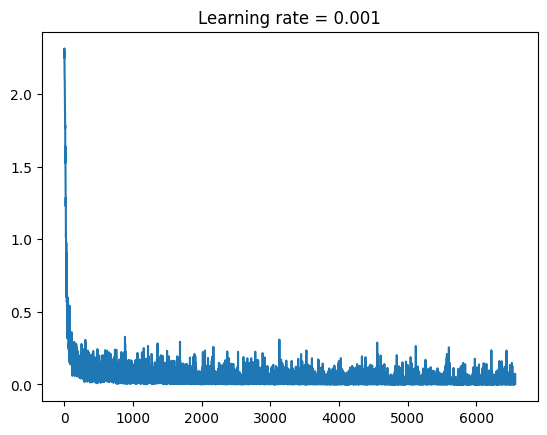

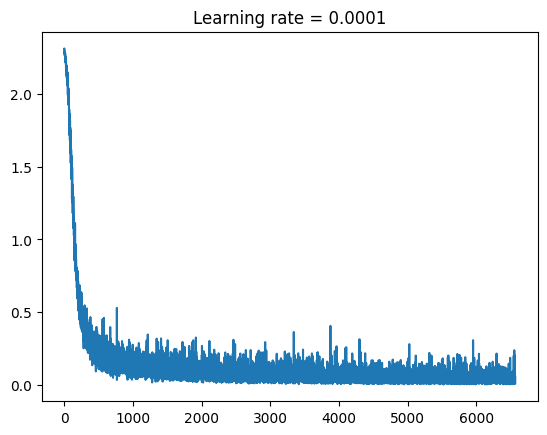

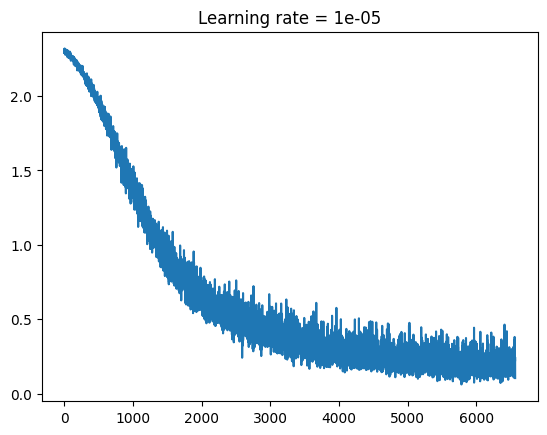

In [101]:
for i in range(len(error)):
    plt.plot(error[i], label='{}'.format(learning_rate[i]))
    plt.title('Learning rate = {}'.format(learning_rate[i]))
    plt.show()

Import the Fashion MNIST dataset

In [ ]:
train_dataset = datasets.FashionMNIST(root = './data',
                               train = True,
                               transform = transforms.Compose([
                                   transforms.Resize((32,32)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.1325,), std = (0.3105,))]),
                               download = True
                               )

test_dataset = datasets.FashionMNIST(root='./data',
                               train=False,
                               transform=transforms.Compose([
                                   transforms.Resize((32, 32)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.1325,), std=(0.3105,))]),
                               download=True
                               )
        
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)

Set hyperparameters (to find the optimal number of epochs)

In [ ]:
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 30
error = []

Set up the ANN

In [ ]:
model = LeNet(num_classes = num_classes).to(device)

cost = F.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)

Run through the neural network, checking for the optimal epoch value using accuracy

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = cost(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total+=labels.size(0)
            correct+=(predicted == labels).sum().item()
    error.append(100 * correct / total)

In [ ]:
plt.plot(error)
plt.show()

In [ ]:
print("Maximum accuracy of the network on the 10000 test images: {} at epoch {}".format(np.max(error), np.argmax(error)))